In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calplot

pd.set_option('display.max_columns', 999)


ModuleNotFoundError: No module named 'calplot'

In [ ]:
df_activities = pd.read_csv('data/garmin_activities.csv')
df_activities.head(99)

,activity_id,name,description,type,course_id,laps,sport,sub_sport,training_effect,anaerobic_training_effect,start_time,stop_time,elapsed_time,moving_time,distance,cycles,avg_hr,max_hr,avg_rr,max_rr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,max_temperature,min_temperature,avg_temperature,start_lat,start_long,stop_lat,stop_long,hr_zones_method,hrz_1_hr,hrz_2_hr,hrz_3_hr,hrz_4_hr,hrz_5_hr,hrz_1_time,hrz_2_time,hrz_3_time,hrz_4_time,hrz_5_time
0,10648586889,Delhi - Run,NaN,uncategorized,NaN,4,running,generic,3.0,0.0,2023-03-07 11:09:59.000000,2023-03-07 11:31:37.000000,00:20:39.419000,00:20:39.419000,1.765769,1536.0,156.0,175.0,NaN,NaN,304,74.0,78.0,5.129294,6.220919,308.398951,314.960630,260.6,NaN,260.6,39.108382,-84.642952,39.108097,-84.642101,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:14.025000,00:00:29.901000,00:04:42.998000,00:13:31.988000,00:00:00.000000
1,10417511167,Rowing 1 on 2 soft,NaN,uncategorized,NaN,6,fitness_equipment,indoor_rowing,0.6,0.0,2023-01-31 11:26:30.000000,2023-01-31 11:34:47.000000,00:08:10.241000,00:08:10.241000,0.000000,193.0,121.0,136.0,NaN,NaN,85,26.0,42.0,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:01:56.632000,00:05:35.159000,00:00:00.000000,00:00:00.000000,00:00:00.000000
2,10668176472,Run,NaN,uncategorized,NaN,4,running,treadmill,3.1,0.0,2023-03-10 12:19:35.000000,2023-03-10 12:47:32.000000,00:27:40.310000,00:27:40.310000,2.210826,1999.0,151.0,165.0,NaN,NaN,392,72.0,78.0,4.793754,5.782480,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:25.211000,00:01:30.001000,00:06:03.000000,00:17:27.982000,00:00:00.000000
3,10379514802,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.8,0.0,2023-01-25 12:41:01.000000,2023-01-25 12:49:53.000000,00:08:07.495000,00:08:07.495000,0.000000,NaN,124.0,138.0,NaN,NaN,90,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:02:49.395000,00:05:18.100000,00:00:00.000000,00:00:00.000000,00:00:00.000000
4,10413760580,Rowing 1 on 2 soft,NaN,uncategorized,NaN,16,fitness_equipment,indoor_rowing,2.1,0.0,2023-01-30 20:38:20.000000,2023-01-30 21:01:06.000000,00:22:39.973000,00:21:07.919000,0.000000,606.0,137.0,155.0,NaN,NaN,272,29.0,46.0,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:49.885000,00:08:08.366000,00:11:39.585000,00:00:00.000000,00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,10602051136,Treadmill Running,NaN,uncategorized,NaN,1,running,treadmill,2.3,0.0,2023-02-28 11:36:34.000000,2023-02-28 11:50:54.000000,00:13:52.303000,00:13:52.303000,1.109999,1010.0,146.0,158.0,NaN,NaN,196,73.0,78.0,4.800464,4.570060,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:09.001000,00:01:32.999000,00:11:26.687000,00:00:10.999000,00:00:00.000000
95,10327182441,Walk/Run Repeats,NaN,uncategorized,NaN,7,running,treadmill,3.1,0.1,2023-01-17 11:13:35.000000,2023-01-17 11:33:51.000000,00:20:00.000000,00:20:00.000000,1.362599,1440.0,161.0,176.0,NaN,NaN,325,72.0,78.0,4.086882,4.780332,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:22.886000,00:00:23.999000,00:02:25.882000,00:15:37.520000,00:00:00.000000
96,10529922446,Indoor Rowing,NaN,uncategorized,NaN,1,fitness_equipment,indoor_rowing,0.8,0.0,2023-02-17 11:37:51.000000,2023-02-17 11:48:14.000000,00:10:13.331000,00:10:13.331000,0.000000,251.0,124.0,136.0,NaN,NaN,111,24.0,26.0,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:01:12.998000,00:08:39.085000,00:00:00.000000,00:00:00.000000,00:00:00.000000
97,10609164476,Delhi Running,NaN,uncategorized,NaN,4,running,generic,3.3,0.0,2023-03-01 11:50:10.000000,2023-03-0

In [ ]:
df_activities.loc[(df_activities['sport'] == 'fitness_equipment'), 'sport'] = df_activities['sub_sport'] 

In [ ]:
df_activities['start_time'] = pd.to_datetime(df_activities['start_time'])

df_activities['date'] = df_activities['start_time'].apply(lambda x : x.date())

In [ ]:
df_activities['date'] = pd.to_datetime(df_activities['date'])
df_activities['month'] = df_activities['date'].apply(lambda x: x.month)
df_activities['week'] = df_activities['date'].apply(lambda x: x.week)
df_activities['day'] = df_activities['date'].apply(lambda x: x.day_name())

In [ ]:
df_activities['hour'] = df_activities['start_time'].apply(lambda x: x.hour)

In [ ]:
df_activities['sport'] = pd.Categorical(df_activities['sport'])

In [ ]:
df_activities.sort_values(by='start_time', ascending=True, inplace=True, ignore_index=True)

In [ ]:
df_activities

,activity_id,name,description,type,course_id,laps,sport,sub_sport,training_effect,anaerobic_training_effect,start_time,stop_time,elapsed_time,moving_time,distance,cycles,avg_hr,max_hr,avg_rr,max_rr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,max_temperature,min_temperature,avg_temperature,start_lat,start_long,stop_lat,stop_long,hr_zones_method,hrz_1_hr,hrz_2_hr,hrz_3_hr,hrz_4_hr,hrz_5_hr,hrz_1_time,hrz_2_time,hrz_3_time,hrz_4_time,hrz_5_time,date,month,week,day,hour
0,10275535173,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.2,0.0,2023-01-09 11:14:38,2023-01-09 11:18:50.000000,00:04:01.260000,00:04:01.260000,0.000000,NaN,107.0,121.0,NaN,NaN,38,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:03:12.999000,00:00:18.862000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,1,2,Monday,11
1,10275535206,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.4,0.0,2023-01-09 11:19:07,2023-01-09 11:24:07.000000,00:04:46.379000,00:04:46.379000,0.000000,NaN,121.0,127.0,NaN,NaN,60,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:44.698000,00:04:01.681000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,1,2,Monday,11
2,10275535247,Treadmill Running,NaN,uncategorized,NaN,2,running,treadmill,2.6,0.0,2023-01-09 11:27:01,2023-01-09 11:39:21.000000,00:11:54.340000,00:11:54.340000,0.999998,868.0,154.0,166.0,NaN,NaN,218,73.0,76.0,5.039817,6.534090,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:15.000000,00:00:21.001000,00:02:20.000000,00:08:09.335000,00:00:00.000000,2023-01-09,1,2,Monday,11
3,10275535278,Treadmill Running,NaN,uncategorized,NaN,2,running,treadmill,2.8,0.0,2023-01-09 11:39:38,2023-01-09 11:52:27.000000,00:12:42.370000,00:12:42.370000,1.081434,918.0,164.0,173.0,NaN,NaN,249,72.0,78.0,5.106925,6.135916,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:00.000000,00:00:27.063000,00:02:11.307000,00:10:03.997000,00:00:00.000000,2023-01-09,1,2,Monday,11
4,10278242382,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.8,0.0,2023-01-09 20:59:26,2023-01-09 21:15:27.000000,00:14:17.384000,00:14:17.384000,0.000000,NaN,115.0,137.0,NaN,NaN,152,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:06:29.195000,00:06:35.999000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,1,2,Monday,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,10827366102,Delhi - Goal Pace Repeats,NaN,uncategorized,NaN,15,running,generic,3.0,0.0,2023-04-03 11:24:22,2023-04-03 11:58:35.000000,00:33:59.460000,00:33:59.460000,2.582779,2365.0,148.0,167.0,NaN,NaN,443,69.0,79.0,4.558876,5.719845,285.433071,357.611549,260.6,NaN,260.6,39.108633,-84.641851,39.10841,-84.643008,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:05:31.636000,00:00:52.001000,00:12:03.929000,00:15:18.954000,00:00:00.000000,2023-04-03,4,14,Monday,11
140,10834357014,Easy Run,NaN,uncategorized,NaN,5,running,treadmill,2.7,0.0,2023-04-04 11:12:48,2023-04-04 11:49:05.000000,00:36:00.474000,00:36:00.474000,2.607553,2481.0,133.0,154.0,NaN,NaN,426,68.0,74.0,4.344130,4.883231,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:11.999000,00:04:03.004000,00:26:17.887000,00:00:00.000000,00:00:00.000000,2023-04-04,4,14,Tuesday,11
141,10837845492,Elliptical,NaN,uncategorized,NaN,1,elliptical,elliptical,1.3,0.0,2023-04-04 22:43:43,2023-04-04 22:55:57.000000,00:12:09.123000,00:12:09.123000,0.000000,626.0,127.0,145.0,NaN,NaN,133,50.0,56.0,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:03:07.000000,00:06:50.002000,00:02:09.616000,00:00

Text(0.5, 1.0, 'Activities Amount')

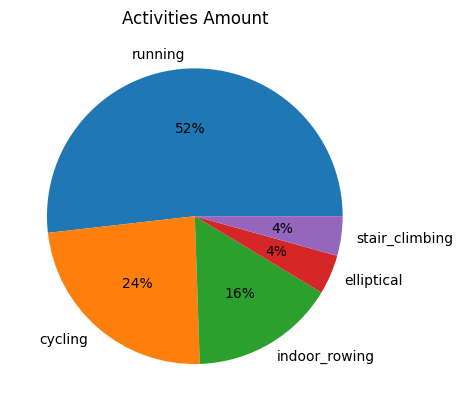

In [ ]:
activities_pie = df_activities['sport'].value_counts()[:5].plot(kind='pie', autopct='%.0f%%',)
activities_pie.set_ylabel('')
activities_pie.set_title('Activities Amount')

<Axes: xlabel='sport'>

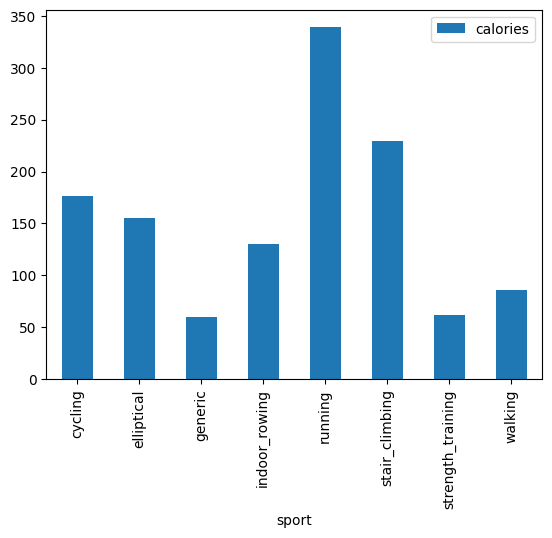

In [ ]:
df_activities.groupby('sport').agg({
    'calories' : 'mean'
}).plot(kind='bar')

<Axes: xlabel='day', ylabel='calories'>

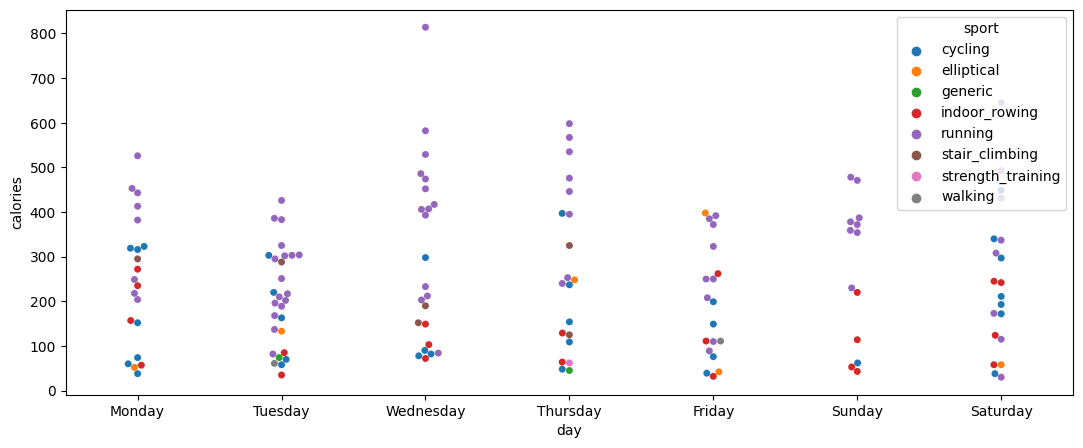

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.swarmplot(data=df_activities, x='day', y='calories', hue='sport', ax=ax,)

<Axes: xlabel='week', ylabel='calories'>

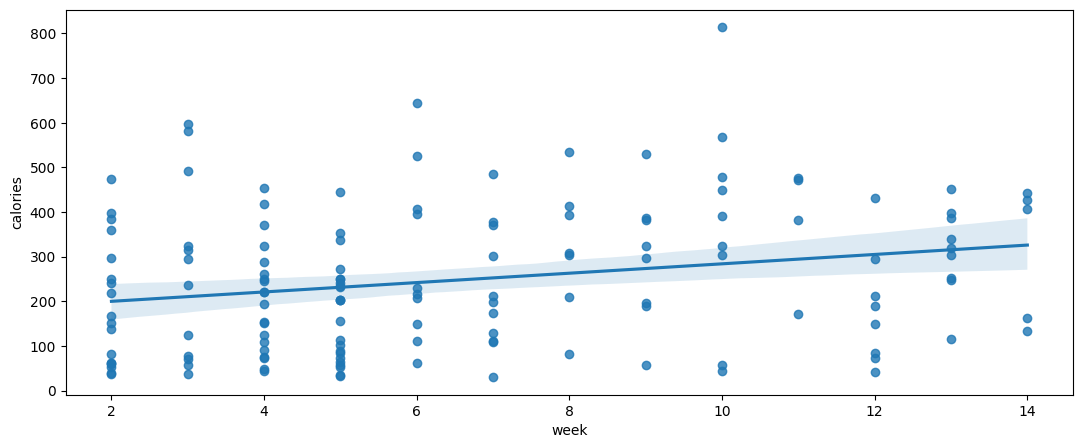

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.regplot(data=df_activities, x='week', y='calories',)

<Axes: xlabel='week', ylabel='avg_hr'>

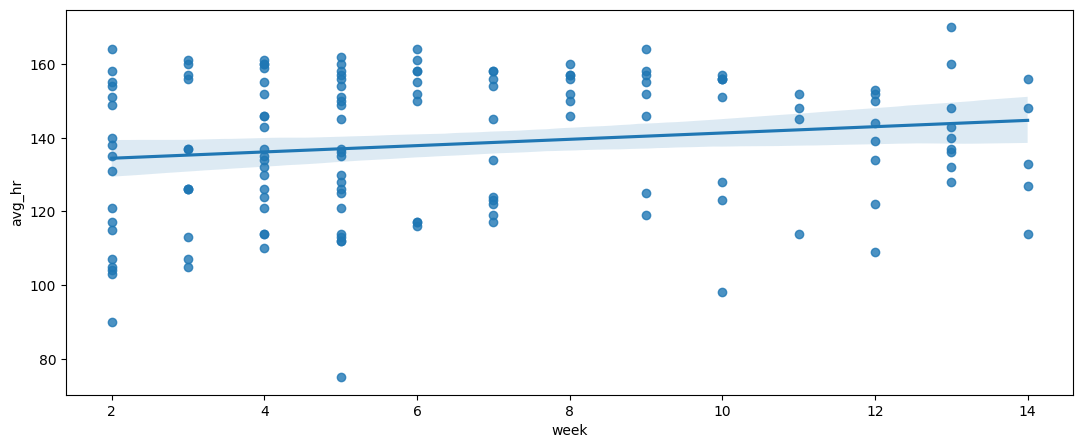

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.regplot(data=df_activities, x='week', y='avg_hr',)

<Axes: ylabel='Frequency'>

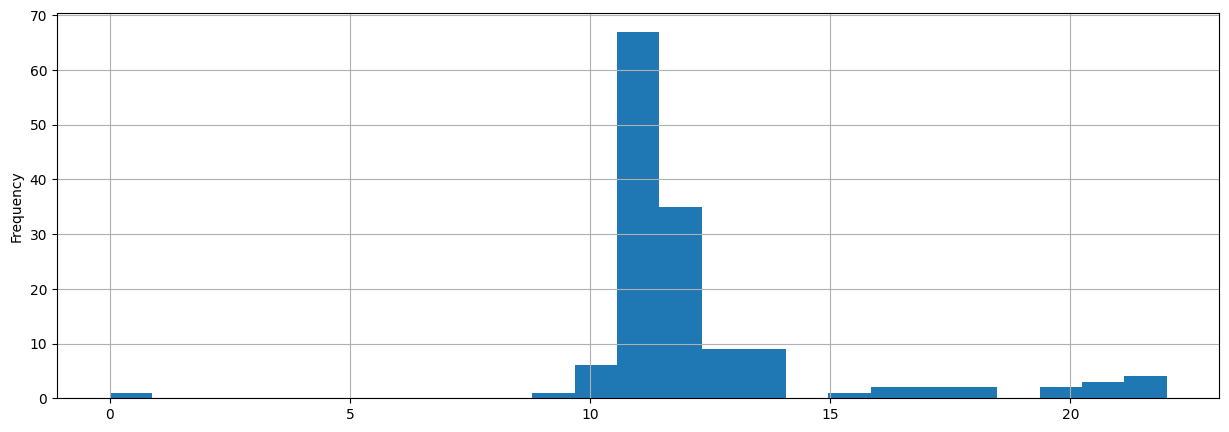

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 5))

df_activities['hour'].plot(kind='hist', bins=25, )

In [ ]:
df_activities['hour'].value_counts()

11    67
12    35
13     9
14     9
10     6
22     4
21     3
20     2
18     2
16     2
17     2
0      1
9      1
15     1
Name: hour, dtype: int64